# Task

Розробити типи для облiку обслуговування у мережi автозаправок на основi записiв про обслуговування. Записи з паливних мiстять номер заправки, дату, вид пального, кiлькiсть пального в лiтрах. На електро – номер заправки, дату, покази електролiчильника(початковий i кiнцевий у квт).<br>
Кожна заправка характеризується номером i назвою селища-мiста, данi усiх заправок задано окремим файлом. Цiна кожного виду палива (за 1 л) та електрики (за 1 квт) задано окремим файлом.<br>
Данi про обслуговування задано окремими файлами для паливних i електричних заправок.<br>

Завдання виконати<br>
1-4 без використання pandas<br>
5-6 з використанням pandas<br>

1. Отримати для кожної заправки виручену суму за весь час, вказуючи у перелiку номер заправки та її мiсцезнаходження.<br>
2. Побудувати графiки для пункту 1. <br>
3. Отримати виручену суму усiма заправками(сумарно) селища-мiста, обраного за допомогою вiджету, за задану вiджетом дату.<br>

4. Побудувати графiки виручки сумарно для усiх паливних i сумарно для усiх електричних заправок щоденно за весь час.<br><br>

5. Визначити перелiк заправок у кожному селищi-мiстi, якi отримали найбiльшу виручку сумарно за перiод часу, заданий за допомогою вiджетiв.<br>

6. Побудувати графiки для п.5. 

In [34]:
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import csv
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Image

In [35]:
class Validation:
    """Class for Validation representation."""

    @staticmethod
    def validateStr(func):
        def validateStrWrapper(w, value):
            if not(isinstance(value, str)):
                raise TypeError('must be an str')
            return func(w, value)
        return validateStrWrapper

    @staticmethod
    def validateFloat(func):
        def validateFloatWrapper(w, value):
            if not(isinstance(value, float)) and not(isinstance(value, int)):
                try:
                    value = float(value)
                except TypeError:
                    raise TypeError('must be an float')
            return func(w, value)
        return validateFloatWrapper

    @staticmethod
    def validateInt(func):
        def validateIntWrapper(w, value):
            if not(isinstance(value, int)):
                try:
                    value = int(value)
                except TypeError:
                    raise TypeError('must be an int')
            return func(w, value)
        return validateIntWrapper

    @staticmethod
    def validateSize(func):
        def validateSizeWrapper(w, value):
            if not(isinstance(value, int)) and not(isinstance(value, float)):
                try:
                    value = float(value)
                except TypeError:
                    raise TypeError('must be an float')
            if value < 0:
                raise ValueError("mast be positive")
            return func(w, value)
        return validateSizeWrapper

    @staticmethod
    def validateAmount(func):
        def validateAmountWrapper(w, value):
            if not(isinstance(value, int)):
                try:
                    value = int(value)
                except TypeError:
                    raise TypeError('must be an int')
            if value < 0:
                raise ValueError("mast be positive")
            return func(w, value)
        return validateAmountWrapper

    @staticmethod
    def validateDate(func):
        def validateDateWrapper(w, date):
            date = datetime.strptime(date, '%Y-%m-%d')
            return func(w, date)
        return validateDateWrapper

In [36]:
class Petrol:
    def __init__(self, s_number, s_date, s_type, s_amount):
        self.s_number = s_number
        self.s_date = s_date
        self.s_type = s_type
        self.s_amount = s_amount

    @property
    def s_number(self):
        return self._s_number

    @s_number.setter
    @Validation.validateAmount
    def s_number(self, val):
        self._s_number = val

    @property
    def s_date(self):
        return self._s_date

    @s_date.setter
    @Validation.validateDate
    def s_date(self, val):
        self._s_date = val

    @property
    def s_type(self):
        return self._s_type

    @s_type.setter
    @Validation.validateStr
    def s_type(self, val):
        self._s_type = val

    @property
    def s_amount(self):
        return self._s_amount

    @s_amount.setter
    @Validation.validateAmount
    def s_amount(self, val):
        self._s_amount = val

    def __str__(self):
        return f'num = {self.s_number}, date = {self.s_date}, type = {self.s_type}, amount = {self.s_amount}'

    def __repr__(self):
        return f'num = {self.s_number}, date = {self.s_date}, type = {self.s_type}, amount = {self.s_amount}'

In [37]:
class Electro:
    def __init__(self, s_number, s_date, s_start_data, s_end_data):
        self.s_number = s_number
        self.s_date = s_date
        self.s_start_data = s_start_data
        self.s_end_data = s_end_data

    @property
    def s_number(self):
        return self._s_number

    @s_number.setter
    @Validation.validateAmount
    def s_number(self, val):
        self._s_number = val

    @property
    def s_date(self):
        return self._s_date

    @s_date.setter
    @Validation.validateDate
    def s_date(self, val):
        self._s_date = val

    @property
    def s_start_data(self):
        return self._s_start_data

    @s_start_data.setter
    @Validation.validateAmount
    def s_start_data(self, val):
        self._s_start_data = val

    @property
    def s_end_data(self):
        return self._s_end_data

    @s_end_data.setter
    @Validation.validateAmount
    def s_end_data(self, val):
        self._s_end_data = val

    def __str__(self):
        return f'num = {self.s_number}, date = {self.s_date}, start_data = {self.s_start_data}, end_data = {self.s_end_data}'

    def __repr__(self):
        return f'num = {self.s_number}, date = {self.s_date}, start_data = {self.s_start_data}, end_data = {self.s_end_data}'

In [38]:
class Petrol_Station:
    def __init__(self, s_number, s_location):
        self.s_number = s_number
        self.s_location = s_location

    @property
    def s_number(self):
        return self._s_number

    @s_number.setter
    @Validation.validateAmount
    def s_number(self, val):
        self._s_number = val

    @property
    def s_location(self):
        return self._s_location

    @s_location.setter
    @Validation.validateStr
    def s_location(self, val):
        self._s_location = val

    def __ge__(self, other):
        return self.s_number > other.s_number
    
    def __eq__(self, other):
        return self.s_number == other.s_number and self.s_location == other.s_location
    
    def __lt__(self, other):
        return self.s_number < other.s_number

    def __hash__(self):
        return hash((self.s_number, self.s_location))

    def __str__(self):
        return f'num = {self.s_number}, location = {self.s_location}'

    def __repr__(self):
        return f'num = {self.s_number}, location = {self.s_location}'

In [39]:
class Price:
    def __init__(self, s_type, s_price):
        self.s_type = s_type
        self.s_price = s_price

    @property
    def s_type(self):
        return self._s_type

    @s_type.setter
    @Validation.validateStr
    def s_type(self, val):
        self._s_type = val

    @property
    def s_price(self):
        return self._s_price

    @s_price.setter
    @Validation.validateAmount
    def s_price(self, val):
        self._s_price = val

    def __str__(self):
        return f's_type = {self.s_type}, price = {self.s_price}'

    def __repr__(self):
        return f's_type = {self.s_type}, price = {self.s_price}'

In [40]:
def read_csv_file(file_name, t, objects):  
    try:
        with open(file_name, 'r') as v:
            r = csv.reader(v)
            next(r)
            for row in r:
                try:
                    objects.append(t(*row))
                except Exception as e:
                    print(f'{file_name}:\nline - {len(objects)}: {e}')
                    continue
    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(e)

In [41]:
dies_data = []
electro_date = []
gas_station = []
prices = []

read_csv_file("dies_data.csv", Petrol, dies_data)
read_csv_file("electro_data.csv", Electro, electro_date)
read_csv_file("gas_station.csv", Petrol_Station, gas_station)
read_csv_file("prices.csv", Price, prices)
dies_data, electro_date, gas_station, prices


([num = 1, date = 2020-12-24 00:00:00, type = Paradigms, amount = 75,
  num = 2, date = 2020-11-22 00:00:00, type = Philippines, amount = 70,
  num = 3, date = 2020-12-21 00:00:00, type = Paradigms, amount = 59,
  num = 4, date = 2020-11-12 00:00:00, type = Frozen, amount = 23,
  num = 5, date = 2020-10-15 00:00:00, type = Philippines, amount = 15,
  num = 6, date = 2020-09-24 00:00:00, type = Philippines, amount = 11,
  num = 7, date = 2020-08-16 00:00:00, type = Frozen, amount = 96,
  num = 8, date = 2020-10-17 00:00:00, type = Ai, amount = 13,
  num = 9, date = 2020-12-18 00:00:00, type = Ai, amount = 93],
 [num = 11, date = 2020-11-27 00:00:00, start_data = 23030, end_data = 81899,
  num = 22, date = 2020-10-23 00:00:00, start_data = 50718, end_data = 96845,
  num = 33, date = 2020-12-22 00:00:00, start_data = 21258, end_data = 89707,
  num = 44, date = 2020-12-21 00:00:00, start_data = 78684, end_data = 91130,
  num = 55, date = 2020-11-14 00:00:00, start_data = 3064, end_data = 7

### 1.
Отримати для кожної заправки виручену суму за весь час, вказуючи у перелiку номер заправки та її мiсцезнаходження. ————————<br>

In [42]:
tot_prices = {}
for z in gas_station:
    for d in dies_data:
        for e in electro_date:
            for p in prices:
                if z.s_number == d.s_number:
                    if d.s_type == p.s_type:
                        tot_prices.setdefault(z, 0)
                        tot_prices[z] += p.s_price * d.s_amount

                if z.s_number == e.s_number:
                    if p.s_type == "Electro":
                        tot_prices.setdefault(z, 0)
                        tot_prices[z] += p.s_price * (e.s_end_data - e.s_start_data)           
                    
tot_prices

{num = 1, location = Relationships: 72750,
 num = 6, location = Grow: 3630,
 num = 3, location = Account: 57230,
 num = 8, location = Awesome: 10010,
 num = 2, location = Purple: 23100,
 num = 4, location = Streamlined: 13110,
 num = 5, location = Relationships: 4950,
 num = 7, location = Grow: 54720,
 num = 22, location = Account: 39023442,
 num = 44, location = Awesome: 10529316,
 num = 8, location = Purple: 10010,
 num = 55, location = Streamlined: 3629340,
 num = 9, location = Relationships: 71610,
 num = 11, location = Grow: 49803174,
 num = 33, location = Account: 57907854,
 num = 66, location = Awesome: 12382902,
 num = 77, location = Purple: 37561554,
 num = 88, location = Streamlined: 7909254,
 num = 99, location = Relationships: 9403290,
 num = 100, location = Grow: 52641504}

### 2.
Побудувати графiки для пункту 1.<br>

In [43]:
def draw_histogram(x, y, x_label, y_label, title, line=True): 
    fig, ax = plt.subplots(figsize=(10, 7))
    if line:
        plt.plot(x, y, 'r--')
    ax.bar(x, y, color='#5499C7', width=0.5, edgecolor='#154360')
    ax.set_title(title, color='black', size=50, fontweight='bold', pad=50)
    ax.set_ylabel(y_label, size=25, fontweight='bold')
    ax.set_xlabel(x_label, size=24, fontweight='bold')
    ax.tick_params(axis='x', rotation=70, direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.tick_params(axis='y', direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.patch.set_facecolor('#B0C4DE')
    fig.patch.set_facecolor('#154360')         
    plt.show()

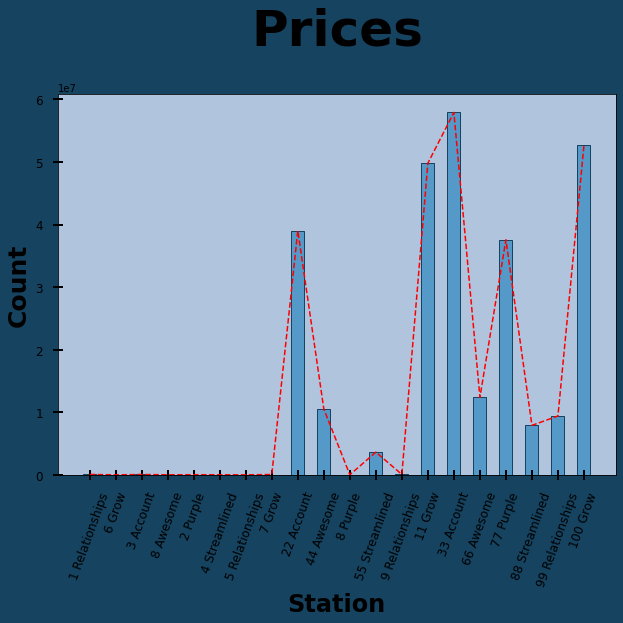

In [44]:
draw_histogram(list(str(i.s_number)+ " " + i.s_location for i in tot_prices.keys()), list(tot_prices.values()), 'Station', 'Count', 'Prices', line=True)

### 3.
Отримати виручену суму усiма заправками(сумарно) селища-мiста, обраного за допомогою вiджету, за задану вiджетом дату.<br>

In [45]:
date=widgets.DatePicker(
    description='Pick a Date',
    disabled=False,
    value=electro_date[0].s_date
)

def task3(date):
    pr = 0
    for p in prices:
        for d in dies_data:
            if d.s_date == date and p.s_type == d.s_type:
                pr += p.s_price * d.s_amount

        for e in electro_date:
            if e.s_date == date and p.s_type == "Electro":
                pr += p.s_price * (e.s_end_data - e.s_start_data)
                 
    print(f"price = {pr}")


interact(task3, date=date);

interactive(children=(DatePicker(value=datetime.datetime(2020, 11, 27, 0, 0), description='Pick a Date'), Outp…

### 4.
Побудувати графiки виручки сумарно для усiх паливних i сумарно для усiх електричних заправок щоденно за весь час.

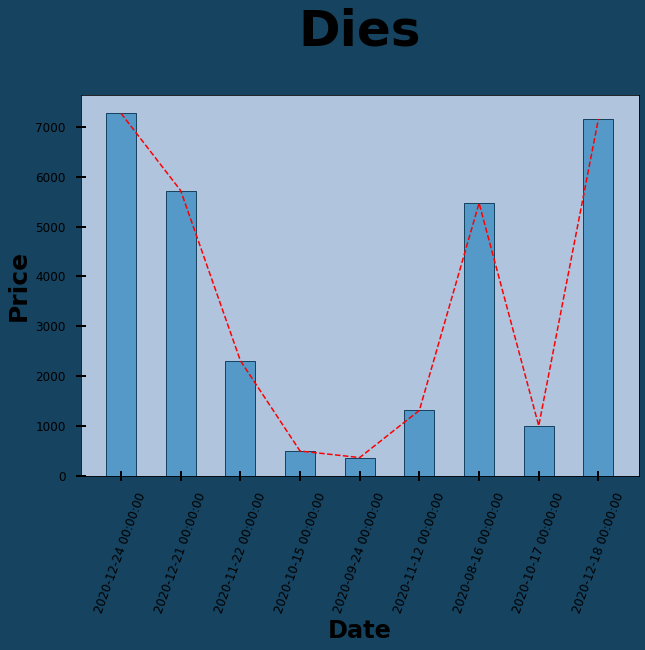

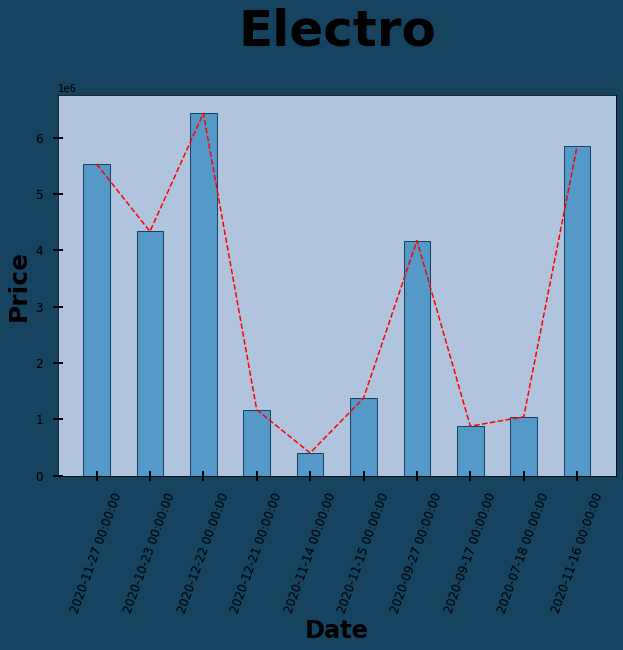

In [46]:
dies_loc_price = {}
el_loc_price = {}
for p in prices:
    for d in dies_data:
        if p.s_type == d.s_type:
            dies_loc_price.setdefault(str(d.s_date), 0)
            dies_loc_price[str(d.s_date)] += p.s_price * d.s_amount
            

    for e in electro_date:
        if p.s_type == "Electro":
            el_loc_price.setdefault(str(e.s_date), 0)
            el_loc_price[str(e.s_date)] += p.s_price * (e.s_end_data - e.s_start_data)


draw_histogram(list(dies_loc_price.keys()), list(dies_loc_price.values()), 'Date', 'Price', 'Dies',line=True)
draw_histogram(list(el_loc_price.keys()), list(el_loc_price.values()), 'Date', 'Price', 'Electro', line=True)

# Pandas

In [47]:
dies_data = pd.read_csv("dies_data.csv")
electro_date = pd.read_csv("electro_data.csv")
gas_station = pd.read_csv("gas_station.csv")
prices = pd.read_csv("prices.csv")  

big_df = electro_date.copy()
big_df["s_type"] = "Electro"
big_df["s_amount"] = big_df["s_end_data"] - big_df["s_start_data"]
big_df = big_df.drop(["s_end_data", "s_start_data"], axis=1)
big_df = big_df.append(dies_data)

big_df = pd.merge(big_df, gas_station, on='s_number', how='left').fillna(0)
big_df = pd.merge(big_df, prices, on='s_type', how='left').fillna(0)
big_df["s_price"] = big_df["s_price"] * big_df["s_amount"]
big_df = big_df.drop("s_amount", axis=1)
big_df



,s_number,s_date,s_type,s_location,s_price
0,11,2020-11-27,Electro,Grow,5533686
1,22,2020-10-23,Electro,Account,4335938
2,33,2020-12-22,Electro,Account,6434206
3,44,2020-12-21,Electro,Awesome,1169924
4,55,2020-11-14,Electro,Streamlined,403260
5,66,2020-11-15,Electro,Awesome,1375878
6,77,2020-09-27,Electro,Purple,4173506
7,88,2020-09-17,Electro,Streamlined,878806
8,99,2020-07-18,Electro,Relationships,1044810
9,100,2020-11-16,Electro,Grow,5849056


### 5.
Визначити перелiк заправок у кожному селищi-мiстi, якi отримали найбiльшу виручку сумарно за перiод часу, заданий за допомогою вiджетiв.<br>
### 6.
Побудувати графiки для п.5. 

In [48]:
locations = set(big_df["s_location"])

def task5(location, plot=False):
    df1 = big_df[big_df["s_location"] == location]
    df1 = df1[df1["s_price"] == df1['s_price'].max()]
    if plot:
        pl = df1.sort_values(by='s_number', ascending=False)
        pl.plot(x='s_number', y='s_price', kind='bar', title=location, figsize=(10, 5), rot=30, color= '#EB984E');
    display(df1)
  
interact(task5, location=locations);

interactive(children=(Dropdown(description='location', options=('Grow', 'Streamlined', 'Purple', 'Relationship…